In [5]:
pip install tensorflow numpy matplotlib


In [6]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Print dataset shapes
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


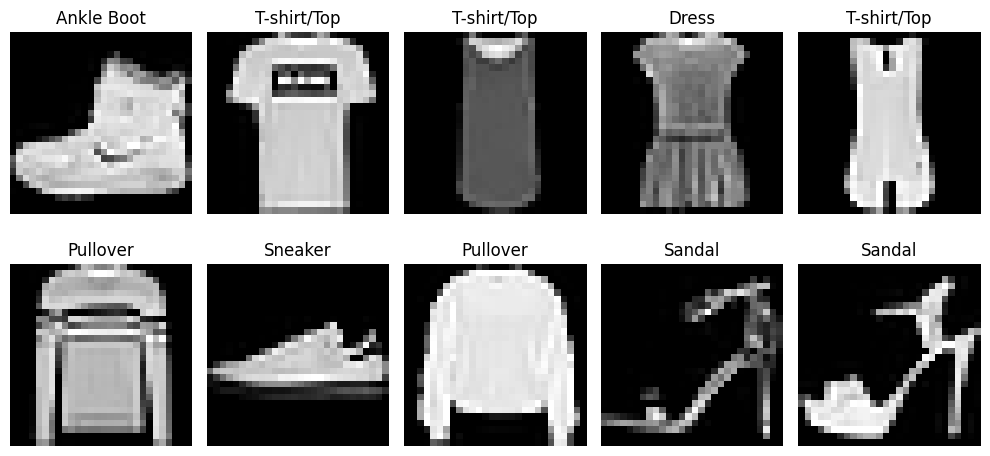

In [7]:
# Define class labels
class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

# Plot first 10 images with labels
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [8]:
# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Add a channel dimension for CNN (28x28 → 28x28x1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print("New training data shape:", x_train.shape)


New training data shape: (60000, 28, 28, 1)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Initialize the model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

# Flatten the output
model.add(Flatten())

# Add dense layers
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Print model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [11]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.8128 - loss: 0.5310 - val_accuracy: 0.8842 - val_loss: 0.3246
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 24ms/step - accuracy: 0.8996 - loss: 0.2714 - val_accuracy: 0.8923 - val_loss: 0.2856
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 24ms/step - accuracy: 0.9170 - loss: 0.2267 - val_accuracy: 0.8992 - val_loss: 0.2722
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 24ms/step - accuracy: 0.9300 - loss: 0.1924 - val_accuracy: 0.9061 - val_loss: 0.2553
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 25ms/step - accuracy: 0.9393 - loss: 0.1631 - val_accuracy: 0.9093 - val_loss: 0.2566
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 25ms/step - accuracy: 0.9475 - loss: 0.1393 - val_accuracy: 0.9082 - val_loss: 0.2652
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 25ms/step - accuracy: 0.9575 - loss: 0.1177 - val_accuracy: 0.9105 - val_loss: 0.2782
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.9657 -

In [12]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9105 - loss: 0.3491
Test Accuracy: 91.43%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


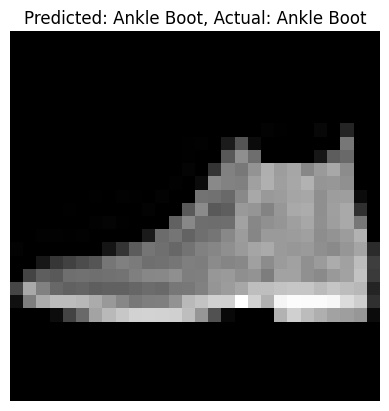

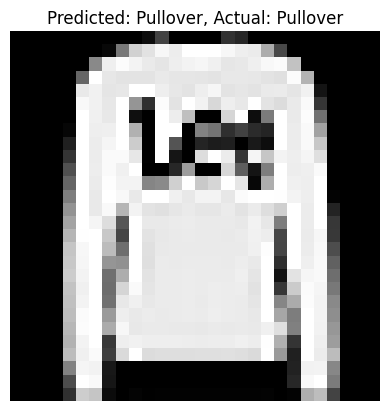

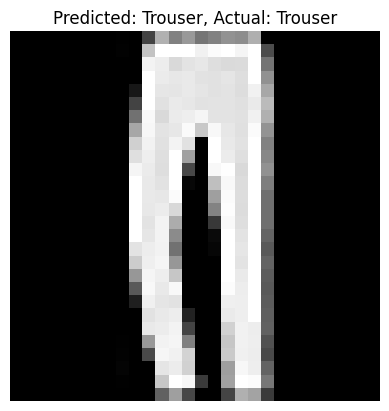

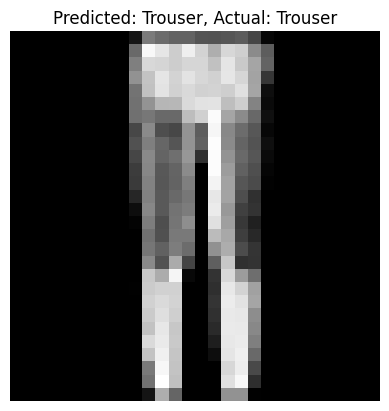

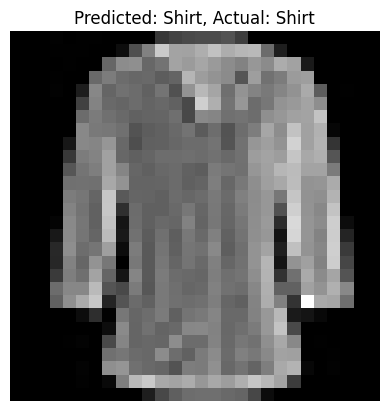

Accuracy for first 5 predictions: 100.00%


In [16]:
predictions = model.predict(x_test[:5])
correct_predictions = 0

# Show predictions
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    predicted_class = class_names[np.argmax(predictions[i])]
    actual_class = class_names[y_test[i]]
    plt.title(f"Predicted: {predicted_class}, Actual: {actual_class}")
    plt.axis('off')
    plt.show()

    # Check if prediction is correct
    if np.argmax(predictions[i]) == y_test[i]:
        correct_predictions += 1

# Calculate and display accuracy
accuracy = (correct_predictions / 5) * 100
print(f"Accuracy for first 5 predictions: {accuracy:.2f}%")